# Introdução a Processamento de Imagens

Imagem é um termo que provem do latim imāgo e que se refere à figura, representação, semelhança ou aparência de algo.

No meio digital, imagens são usadas principalmente no marketing e na divulgação de diferentes assuntos.

O que pode-se fazer com Python?

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mtimg

In [2]:
# Vamos usar essa função para plotar as várias imagens pertencentes a esse notebook
def plot_image(img, img_name):
    #definindo as dimensões da do gráfico que sustentará a imagem advinda de uma matriz
    plt.figure(figsize=(20,6))
    
    #removendo a moldura do gráfico
    plt.axis(False)

    #plotando a imagem recebida
    plt.imshow(img)

    #adicionando o título do gráfico
    plt.title(img_name)

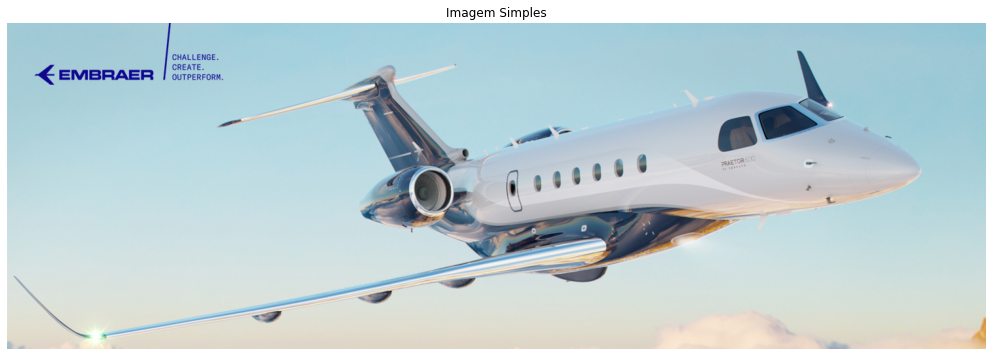

In [3]:
img = plt.imread('img_exp.png', 0)
plot_image(img, 'Imagem Simples')

In [4]:
type(img)

numpy.ndarray

Como podemos ver acima, a imagem foi armazenada numa matriz 'ndarray', se printarmos ela não poderemos ver todos os elementos pelo seu extenso tamanho.
Para demonstrar isso, o print usa das reticências, informando a continuidade da matriz.

In [5]:
print(img)

[[[169 205 219]
  [165 201 215]
  [164 202 215]
  ...
  [149 198 213]
  [149 198 213]
  [149 198 213]]

 [[169 205 219]
  [165 201 215]
  [164 202 215]
  ...
  [149 198 213]
  [149 198 213]
  [147 199 213]]

 [[169 205 219]
  [164 202 215]
  [164 202 215]
  ...
  [146 198 212]
  [147 199 213]
  [146 198 212]]

 ...

 [[171 190 197]
  [166 186 193]
  [167 188 193]
  ...
  [230 193 148]
  [230 193 148]
  [231 194 149]]

 [[169 189 196]
  [165 185 192]
  [165 186 191]
  ...
  [232 195 151]
  [233 196 151]
  [231 197 151]]

 [[168 188 195]
  [162 185 191]
  [165 186 191]
  ...
  [232 198 152]
  [232 198 152]
  [232 198 152]]]


In [6]:
#verificando as dimensões dessa matriz
img.shape

(500, 1500, 3)

Note a multidimensionalidade da matriz, contendo 500 linhas e 1500 colunas, além também das 3 camadas representando o *Padrão RGB* de cores, isto é, a intensidade de que cada pixel tem de vermelho (Red), verde (Green) e azul (Blue), sendo cada camada é estabelecida por sua própria matriz.

# Relação com Álgebra Linear
Considerando a interpretação de imagens como matrizes, a aplicaçação de operações matriciais também se torna válida. Abaixo, apresentamos alguns exemplos. 


## Matriz inversa
Seja:
\begin{align}
  M = \begin{bmatrix} 
    a & b \\
    c & d \\
  \end{bmatrix}
\end{align}

Sua matriz inversa ($M^{-1}$), se existir, seria o equivalente a:
\begin{align}
  M^{-1} = \frac{1}{ad-bc} 
  \begin{bmatrix}
    d & -b \\
    -c & a \\
  \end{bmatrix}
\end{align}

Obs: Uma matriz $M$ só é invertível caso seu determinante seja não-nulo ($det(M)$ $\neq 0$).

Exemplo:

Considere a seguinte inversão matricial:
\begin{align}
  M = \begin{bmatrix}
    6 & 1 \\
    5 & 2 \\
  \end{bmatrix}
\end{align}

\begin{align}
  M^{-1} = \frac{1}{7} 
    \begin{bmatrix}
    2 & -1 \\
    -5 & 6 \\
  \end{bmatrix}
\end{align}

\begin{align}
  M^{-1} = 
    \begin{bmatrix}
    2/7 & -1/7 \\
    -5/7 & 6/7 \\
  \end{bmatrix}
\end{align}

Numa imagem, cada pixel tem sua cor invertida, simplesmente invertendo sua matriz correspondente.

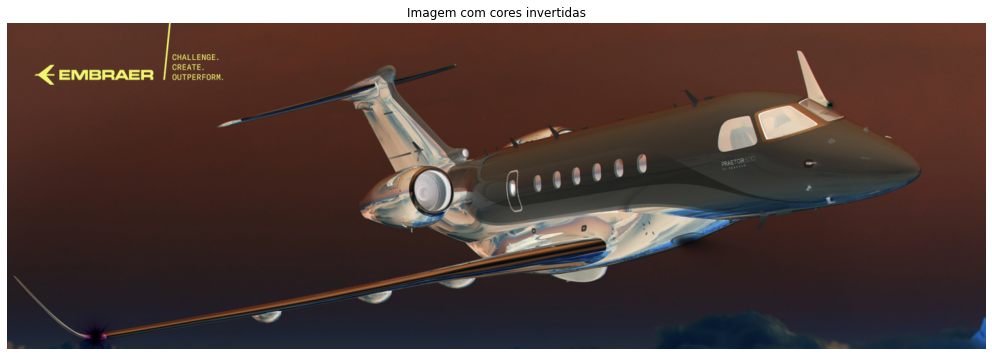

In [7]:
img_inv = np.invert(img)
plot_image(img_inv, "Imagem com cores invertidas")

Para clareza do que foi feito, podemos reiverter a matriz que foi invertida, conseguindo assim, reobter a matriz original.

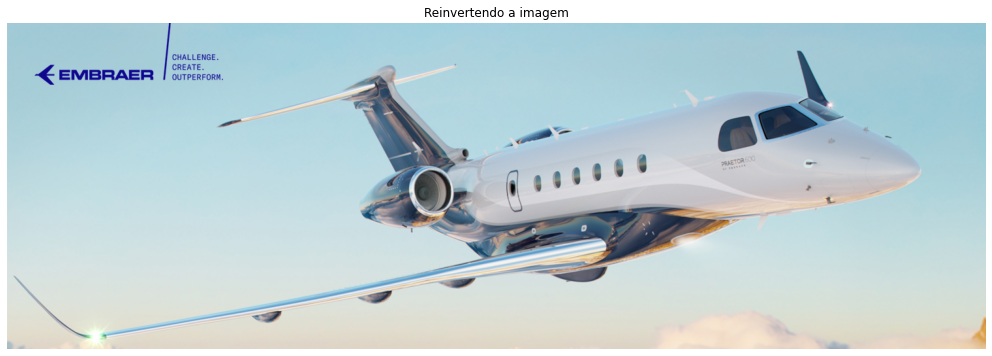

In [8]:
img_og = np.invert(img_inv)
plot_image(img_og, "Reinvertendo a imagem")

## Matriz Transposta
A transposição de uma matriz troca entre si suas linhas e colunas. A transposta de uma matriz $M_{3 \ 2}$ é definida por $M^t_{2 \ 3}$.

Acima pode-se perceber que houve a troca de '$n$' por '$m$' na matriz transposta. Ou seja, os elementos dispostas nas linhas de uma matriz foram organizados na coluna da matriz originada após as substituições.


Exemplo:

Considere a seguinte matriz:
\begin{align}
  M = \begin{bmatrix}
    a & b & c\\ 
    d & e & f\\ 
  \end{bmatrix} 
\end{align}

Sua matriz transposta seria:
\begin{align}
  M^t = \begin{bmatrix}
    a & d \\ 
    b & e \\ 
    c & f \\ 
  \end{bmatrix} 
\end{align}

Numa imagem, isso seria equivalente a rotacionar a matriz 90° para esquerda.

In [9]:
img_tr = np.transpose(img)

Só isso não é suficientemente, dado que não foi invertido somente as linhas e as colunas, mas também a posição delas entre as camadas. 
Obs: Mais sobre as camadas será falado a seguir.

In [10]:
img_tr = np.swapaxes(img_tr, 0, 1)
img_tr = np.swapaxes(img_tr, 1, 2)

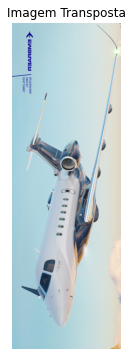

In [11]:
plot_image(img_tr, "Imagem Transposta")

## Matriz de Rotação

Uma matriz de rotação, como o próprio nome já diz, é uma matriz que roda um vetor no espaço em que está contido.
Aqui nos limitaremos a rotação no $\mathbb{R}^2$.

### Rotação no $\mathbb{R}^2$
A rotação é a transformação $R: \mathbb{R}^2 \to \mathbb{R}^2$, tal que $R(\vec v) = \vec u$, sendo $\vec u$ o vetor $\vec v$ rotacionado $\theta$ graus. Obviamente, a rotação pode tanto ocorrer no sentido horário quanto no sentido anti-horário.

Esta rotação deve seguir algumas regras:

1 - $Rot_\theta(\vec x + \vec y) = Rot_\theta(\vec x) + Rot_\theta(\vec y)$

2 - $Rot_\theta(c \vec x) = c \cdot Rot_\theta(\vec x)$  

Fazendo uso de manipulação algébrica e considerando a fórmula de Pitágoras podemos chegar ao resultado de que a transformação responsável pela rotação anti-horária de vetores no $\mathbb{R}^2$ é dada por:

\begin{align}
  R = 
  \begin{bmatrix}
    cos(\theta) & -sen(\theta) \\ 
    sen(\theta) & cos(\theta) \\
  \end{bmatrix}
\end{align}

Aqui, usaremos uma função pronta pertencente a biblioteca *scipy* chamada **ndimage**. A mesma é reponsável por rotacionar uma matriz de entrada no plano definido pelos eixos (axes) dados como parâmetro.

In [12]:
# importando a biblioteca scipy do python
from scipy import ndimage

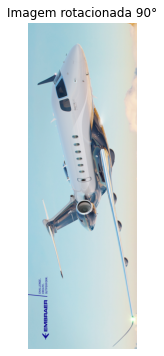

In [13]:
# a variável img_rt recebe a matriz da variável img após sofrer uma transformação linear
# usando uma matriz de rotação. O ângulo é 90°
img_rt = ndimage.rotate(img, 90)
plot_image(img_rt, "Imagem rotacionada 90°")

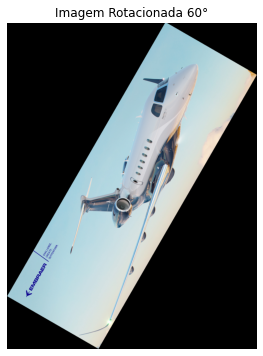

In [14]:
# Agora aplicando uma rotação de 60°.
img_rt = ndimage.rotate(img, 60)
plot_image(img_rt,"Imagem Rotacionada 60°")

# Camadas da Imagem
Uma única imagem é formada por 3 matrizes diferentes combinadas linearmente, sendo cada uma delas correspondente a intensidade de cor (Vermelho, Verde e Azul) de cada camada. Assim, podemos vizualizar cada camada de forma individual.

In [17]:
# vamos pegar cada camada de matrizes que compõem a imagem
# primeiro a variável R recebe uma cópia da matriz que posssui os dados da imagem
# segundo vamos zerar as outras duas camadas, levando em considaderação todas as suas linhas e colunas
R = img.copy()
R[:, :, [1, 2]] = 0

# fazemos o mesmo para G e B
G = img.copy()
G[:, :, [0,2]] = 0


B = img.copy()
B[:, :, [0, 1]] = 0

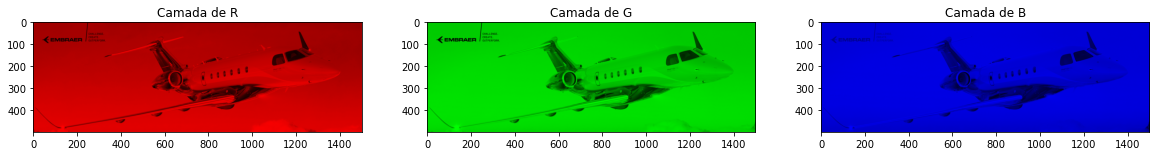

In [24]:
plt.figure(figsize = (20,6))

# o comando subplot tem a finalidade de plotar mais de um gráfico em uma única compilação

# as entradas subplot(1,3,1) indicam que o gráfico tem uma linha, 3 colunas e o próximo gráfico a ser 
# plotado ficará na posição 1

def plot_subplots(title, img):
    plt.title(title)
    plt.axis()
    plt.imshow(img)

plt.subplot(1, 3, 1)
plot_subplots("Camada de R", R)

plt.subplot(1, 3, 2)
plot_subplots("Camada de G", G)

plt.subplot(1, 3, 3)
plot_subplots("Camada de B", B)

Agora é mais fácil de perceber que o cada matriz individualmente corresponde ao comportamento de cada cor. Podemos combinar linearmente estas matrizes para reconstruir a imagem original.

In [ ]:
# mesmo tendo zerado as camadas que não são aquelas referenciadas na matriz, elas ainda existem.
# Portando, para evitar erros de compilação, vamos pegar as linhas, colunas e camadas individuais da matriz
img_RGB = np.array([R[:, :, 0], G[:, :, 1], B[:, :, 2]])

# novamente, as matrizes de camadas estão desordenadas no array multidimensional imagem.
# Vamos fazer permutações entre as camadas de forma que elas fiquem na ordem desejada
img_RGB = np.swapaxes(img_RGB, 0, 1)
img_RGB = np.swapaxes(img_RGB, 1, 2)

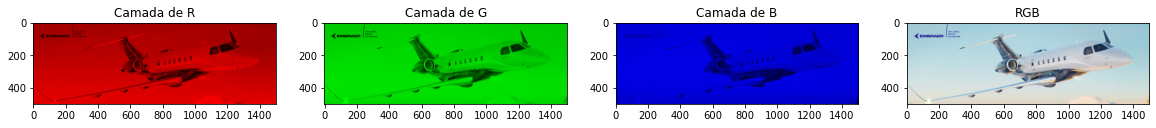

In [30]:
plt.figure(figsize = (20,6))
plt.subplot(1, 4, 1)
plot_subplots("Camada de R", R)

plt.subplot(1, 4, 2)
plot_subplots("Camada de G", G)

plt.subplot(1, 4, 3)
plot_subplots("Camada de B", B)

plt.subplot(1, 4, 4)
plot_subplots("RGB", img_RGB)

# Caos 

Será utilizado uma tranformação linear sobre um quadrado unitário do plano xy para interpretar o conceito da aplicação caótica.

O termo **caos** é utilizado em algumas transformações matemáticas e em alguns fenômenos físicos que parecem possuir um comportamento totalmente aleatório e imprevisível, porém, possui um elemento de ordem bem definido. Exemplos de sistemas caóticos são a vibração da asa de um avião, o embaralhar das cartas de um baralho e a geração de números aleatórios.

A partir daqui, será apresentado a transformação caótica denominada gato de Arnold, em homenagem ao matemático Vladimir I. Arnold, o primeiro à utlizar o esboço de um gato para representa-lá.

## Gato de Arnold

A transformação do gato de Arnold é uma aplicação $\Gamma: \rm I\!R^2 \rightarrow \rm I\!R^2$, definida como:

$\begin{equation} 
\Gamma:(x,y) \rightarrow (x+y,x+2y)\mod1
\end{equation}$

Podendo ser definida na forma matricial:

$\begin{equation} 
\Gamma 
\left(\begin{bmatrix}x \\ y\end{bmatrix}\right) = 
\begin{bmatrix}1&1 \\ 1&2\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} \mod 1 
\end{equation}$

E na forma fatorada:

$\begin{equation} 
\Gamma \left(\begin{bmatrix}x \\ y\end{bmatrix}\right) = 
\begin{bmatrix}1&0 \\ 1&1\end{bmatrix}\begin{bmatrix}1&1 \\ 0&1\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} \mod 1 \end{equation}$

Nesse formato, é possível interpretar a transformação como um cisalhamento duplo, primeiramente na direção x e posteriomente na posição y, ambos de fator 1. Também é possível interpretar que, ao ser uma operação aritmética $\mod 1$, a transformação leva para um ponto de um quadrado unitário, denominado S. Computacionalmente, é mais adequado realizar a operação modular a cada cisalhamento e, para facilitar a vizualização, S será um quadrado de tamanho P (quantidade de pixels em um eixo), como é possível ver a seguir:

(152, 152)


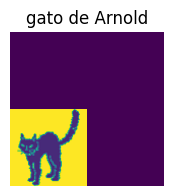

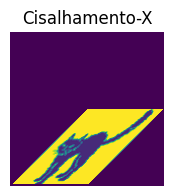

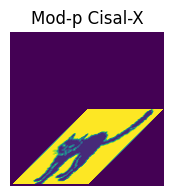

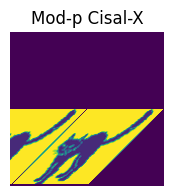

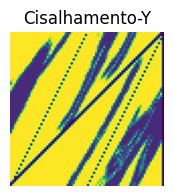

In [156]:
img = mtimg.imread("gato76.pgm")
p = img.shape[0]
p1 = p-1

shape = [p*2,p*2]
img2 = np.zeros(shape, dtype=np.int32)
img2[img2.shape[1]-p:img2.shape[0], :p] = img
img = img2
imgplot = plot_image(img, "gato de Arnold", 2, 2)

print(img.shape)
cis1 = np.array([[1,0],[1,1]])
cis2 = np.array([[1,1],[0,1]])

cis1_img = np.zeros(shape)
for l in range(p1, 2*p1):
  for c in range(0, p1):
    cis1_img[l,c-l] = img[l,c] 
imgplot = plot_image(cis1_img, "Cisalhamento-X", 2, 2)

mod1_img = cis1_img.copy()#np.zeros(shape)
for l in range(p1, 2*p1):
  for c in range(p1):
    mod1_img[l,c%p] = cis1_img[l,c] 
imgplot = plot_image(mod1_img, "Mod-p Cisal-X", 2, 2)

# Cisalhamento no eixoX
mod1_img = cis1_img.copy()#np.zeros(shape)
for l in range(p1, 2*p1):
  for c in range(p1):
    mod1_img[l,(c-l)%p] = img[l,c] 
imgplot = plot_image(mod1_img, "Mod-p Cisal-X", 2, 2)

#Cisalhamento no eixoY
cis2_img = np.zeros([p,p]) 
for l in range(p1, 2*p):
  for c in range(p1):
    cis2_img[(l-c)%p,c%p] = mod1_img[l,c] 
imgplot = plot_image(cis2_img, "Cisalhamento-Y", 2, 2)

(152, 152)


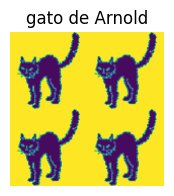

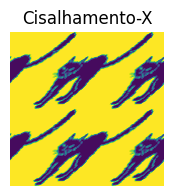

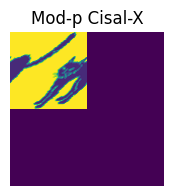

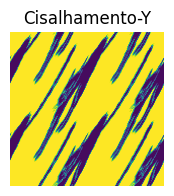

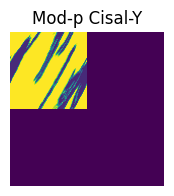

In [188]:
def quadruplicar(img, p):
  shape = [p*2,p*2]
  img2 = np.zeros(shape, dtype=np.int32)
  img2[:p, :p] = img
  img2[img2.shape[1]-p:img2.shape[0], :p] = img
  img2[:p, img2.shape[1]-p:img2.shape[0]] = img
  img2[img2.shape[1]-p:img2.shape[0], img2.shape[1]-p:img2.shape[0]] = img
  return img2

ori_img = mtimg.imread("gato76.pgm")
p = ori_img.shape[0]
p1 = p-1

img = quadruplicar(ori_img, p)
# shape = [p*2,p*2]
# img2 = np.zeros(shape, dtype=np.int32)
# img2[:p, :p] = img
# img2[img2.shape[1]-p:img2.shape[0], :p] = img
# img2[:p, img2.shape[1]-p:img2.shape[0]] = img
# img2[img2.shape[1]-p:img2.shape[0], img2.shape[1]-p:img2.shape[0]] = img

pp = img.shape[0]
imgplot = plot_image(img, "gato de Arnold", 2, 2)

print(img.shape)
cis1 = np.array([[1,0],[1,1]])
cis2 = np.array([[1,1],[0,1]])

#Cisalhamento no eixoX
cis1_img = np.zeros(shape)
for l in range(pp):
  for c in range(pp):
    cis1_img[l,c-l] = img[l,c] 
imgplot = plot_image(cis1_img, "Cisalhamento-X", 2, 2)

#Aplicando a operação modular
mod1_img = np.zeros(shape)
for l in range(pp):
  for c in range(pp):
    mod1_img[l%p,c%p] = cis1_img[l,c] 
imgplot = plot_image(mod1_img, "Mod-p Cisal-X", 2, 2)
img = quadruplicar(mod1_img[:p,:p], p)

#Cisalhamento no eixoY
cis2_img = np.zeros(shape) 
for l in range(pp):
  for c in range(pp):
    cis2_img[l-c,c] = img[l,c]
imgplot = plot_image(cis2_img, "Cisalhamento-Y", 2, 2)

#Aplicando a operação modular novamente
mod2_img = np.zeros(shape)
for l in range(pp):
  for c in range(pp):
    mod2_img[l%p,c%p] = cis2_img[l,c] 
imgplot = plot_image(mod2_img, "Mod-p Cisal-Y", 2, 2)